In [3]:
import keras
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

In [4]:
# for random seed
np.random.seed(2)

X_dataCNN = np.empty([1000, 50, 50])
X_dataANN = np.empty([1000, 2500])
y_data = np.empty([1000])
dirdata = "./DS/"
for i in range(1000):
    dataset = pd.read_csv(dirdata + 'data'+str(i)+'.csv')
    dataset_headerless = dataset.to_csv(header=None,index=False)
    X_dataCNN[i] = np.reshape(np.array((dataset_headerless.replace("[",'').replace("]","").replace('\n',"")).split()), (-1,50))
    X_dataANN[i] = np.array((dataset_headerless.replace("[",'').replace("]","").replace('\n',"")).split())
    y_data[i] = np.array((dataset.columns[0].split(":"))[1])
    
# split data into a train and test set
X_trainCNN, X_testCNN, X_trainANN, X_testANN, y_train, y_test = train_test_split(X_dataCNN, X_dataANN, y_data, test_size=0.2, random_state=42)

In [5]:
X_dataCNN.shape, X_dataANN.shape, y_data.shape

((1000, 50, 50), (1000, 2500), (1000,))

In [6]:
# Print shape of Data
X_trainCNN.shape, X_testCNN.shape, X_trainANN.shape, X_testANN.shape, y_train.shape, y_test.shape

((800, 50, 50), (200, 50, 50), (800, 2500), (200, 2500), (800,), (200,))

# Feature  Scaling

In [7]:
max_X_value = np.amax(X_dataCNN)
max_y_value = np.amax(y_data)
print(max_X_value, max_y_value)

499.0 1981.0


In [8]:
X_trainCNN = X_trainCNN.astype('float32')/max_X_value
X_testCNN  = X_testCNN.astype('float32')/max_X_value
X_trainANN = X_trainANN.astype('float32')/max_X_value
X_testANN  = X_testANN.astype('float32')/max_X_value
y_train   = y_train.astype('float32')/max_y_value
y_test    = y_test.astype('float32')/max_y_value

# ANN Model

In [9]:
X_train_ann, X_validation_ann, y_train_ann, y_validation_ann = train_test_split(X_trainANN, y_train, test_size= 0.2, random_state=2020)

In [10]:
X_train_ann.shape,  X_validation_ann.shape, y_train_ann.shape, y_validation_ann.shape

((640, 2500), (160, 2500), (640,), (160,))

In [11]:
# Create ann model
modelann = Sequential()
modelann.add(Dense(16, input_dim=2500, kernel_initializer='normal', activation='relu'))
modelann.add(Dense(1, kernel_initializer='normal'))
# Compile model
modelann.compile(loss='mean_squared_error', optimizer='adam')

In [12]:
# call the function to fit to the data to train the network
modelann.fit(X_train_ann, y_train_ann, epochs = 70, batch_size=20, validation_data=(X_validation_ann, y_validation_ann))


Train on 640 samples, validate on 160 samples
Epoch 1/70
640/640 [==============================] - 0s 193us/step - loss: 0.0744 - val_loss: 0.0104
Epoch 2/70
640/640 [==============================] - 0s 57us/step - loss: 0.0072 - val_loss: 0.0075
Epoch 3/70
640/640 [==============================] - 0s 58us/step - loss: 0.0056 - val_loss: 0.0070
Epoch 4/70
640/640 [==============================] - 0s 76us/step - loss: 0.0051 - val_loss: 0.0065
Epoch 5/70
640/640 [==============================] - 0s 60us/step - loss: 0.0046 - val_loss: 0.0062
Epoch 6/70
640/640 [==============================] - 0s 60us/step - loss: 0.0043 - val_loss: 0.0061
Epoch 7/70
640/640 [==============================] - 0s 64us/step - loss: 0.0039 - val_loss: 0.0056
Epoch 8/70
640/640 [==============================] - 0s 68us/step - loss: 0.0035 - val_loss: 0.0054
Epoch 9/70
640/640 [==============================] - 0s 63us/step - loss: 0.0033 - val_loss: 0.0055
Epoch 10/70
640/640 [======================

In [13]:
# save the ann model
modelann.save('Student-ID-ANN.h5')

# CNN Model

In [14]:
X_trainCNN.ndim, X_testCNN.ndim

(3, 3)

In [15]:
X_trainCNN = np.expand_dims(X_trainCNN, -1)
X_testCNN = np.expand_dims(X_testCNN, -1)

In [16]:
X_trainCNN.ndim, X_testCNN.ndim

(4, 4)

In [17]:
X_trainCNN, X_validationCNN, y_trainCNN, y_validationCNN = train_test_split(X_trainCNN, y_train, test_size= 0.2, random_state=2020)

In [18]:
X_trainCNN.shape,  X_validationCNN.shape, y_trainCNN.shape, y_validationCNN.shape

((640, 50, 50, 1), (160, 50, 50, 1), (640,), (160,))

In [19]:
# Creatinging CNN model
mod_CNN = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[50,50,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=1, activation='linear')
])

In [20]:
mod_CNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 2,359,873
Trainable params: 2,359,873
Non-trainable params: 0
_________________________________________________________________


In [21]:
# complie the cnn model
mod_CNN.compile(loss='mean_squared_error', optimizer='adam')

In [22]:
# train cnn model
mod_CNN.fit(X_trainCNN, y_trainCNN, epochs=70, batch_size=512, verbose=1, validation_data=(X_validationCNN, y_validationCNN))

Train on 640 samples, validate on 160 samples
Epoch 1/70
640/640 [==============================] - 1s 849us/step - loss: 24.1821 - val_loss: 7.4547
Epoch 2/70
640/640 [==============================] - 0s 713us/step - loss: 6.1290 - val_loss: 0.7687
Epoch 3/70
640/640 [==============================] - 0s 699us/step - loss: 0.7661 - val_loss: 0.7699
Epoch 4/70
640/640 [==============================] - 0s 700us/step - loss: 0.7195 - val_loss: 0.2919
Epoch 5/70
640/640 [==============================] - 0s 714us/step - loss: 0.2520 - val_loss: 0.0037
Epoch 6/70
640/640 [==============================] - 0s 715us/step - loss: 0.0113 - val_loss: 0.1342
Epoch 7/70
640/640 [==============================] - 0s 706us/step - loss: 0.1462 - val_loss: 0.1882
Epoch 8/70
640/640 [==============================] - 0s 706us/step - loss: 0.1765 - val_loss: 0.0652
Epoch 9/70
640/640 [==============================] - 0s 711us/step - loss: 0.0553 - val_loss: 0.0022
Epoch 10/70
640/640 [==============

In [23]:
# save the cnn model
mod_CNN.save('Student-ID-CNN.h5')

# Load the models

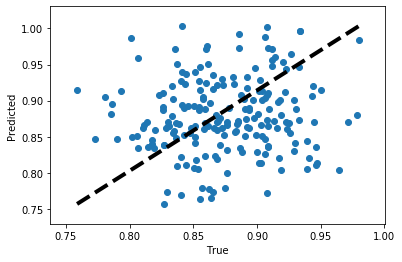

In [24]:
from keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline

load_annmodel = load_model('Student-ID-ANN.h5')
# Predict
pred_ann = load_annmodel.predict(X_testANN)
fig, ax = plt.subplots()
ax.scatter(y_test, pred_ann)
ax.plot([y_test.min(), y_test.max()], [pred_ann.min(), pred_ann.max()], 'k--', lw=4)
ax.set_xlabel('True')
ax.set_ylabel('Predicted')
plt.show()

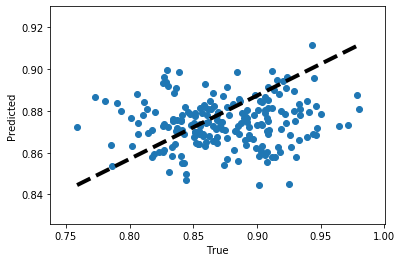

In [25]:
load_cnnmodel = load_model('Student-ID-CNN.h5')

# Predict
pred_cnn = load_cnnmodel.predict(X_testCNN)
fig, ax = plt.subplots()
ax.scatter(y_test, pred_cnn)
ax.plot([y_test.min(), y_test.max()], [pred_cnn.min(), pred_cnn.max()], 'k--', lw=4)
ax.set_xlabel('True')
ax.set_ylabel('Predicted')
plt.show()

In [26]:
from sklearn import metrics

# Measure Mean Square Error error.  
score = metrics.mean_squared_error(pred_ann, pred_cnn)
print("Mean Square Error : ",score)

# Measure Root Mean Square Error error
score = np.sqrt(metrics.mean_squared_error(pred_ann, pred_cnn))
print("Root Mean Square Error : ",score)

Mean Square Error :  0.002802118
Root Mean Square Error :  0.052935034
